In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'Dataset/train'
validation_dir = r'Dataset/test'
test_dir = r'Dataset/validation'

## Data Preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
#generating batches for image data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( #we are using data from directory (dataset folder)
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( #we are using data from directory (dataset folder)
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers,models

## Creating Model

In [7]:
#sequential Model with 4 Conv2D layers with Max pooling layers,1 flattern layer and 2 Dense Layers

model=models.Sequential()

#Conv2D(filters,window dimension for filter,activation, input shape)
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

#Dense(no. of neurons,activation function)
model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

#compiling the model by setting the learning rate and loss parameter
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),#lr=0.001
             metrics=['acc'])

In [10]:
history=model.fit(train_generator,
                 steps_per_epoch=100,#stopping point for generating the data
                 epochs=30,
                 validation_data=validation_generator,
                 validation_steps=50)#total validation//batch size of validation_generator

#batch size in train_generator=20, no. of steps=100 
#20 images 1000 times
#total 2000 images (total number of training images)

Epoch 1/30
100/100 [==============================] - 39s 380ms/step - loss: 0.6954 - acc: 0.5114 - val_loss: 0.6790 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 40s 401ms/step - loss: 0.6716 - acc: 0.5886 - val_loss: 0.6489 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 37s 368ms/step - loss: 0.6232 - acc: 0.6699 - val_loss: 0.6035 - val_acc: 0.6840
Epoch 4/30
100/100 [==============================] - 37s 375ms/step - loss: 0.5727 - acc: 0.6947 - val_loss: 0.5896 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 37s 373ms/step - loss: 0.5541 - acc: 0.7047 - val_loss: 0.5855 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 36s 363ms/step - loss: 0.5385 - acc: 0.7392 - val_loss: 0.5806 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 35s 354ms/step - loss: 0.5136 - acc: 0.7453 - val_loss: 0.5593 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 3

In [11]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    pd.DataFrame(history.history).to_csv(f)

In [12]:
model.save('model.h5')

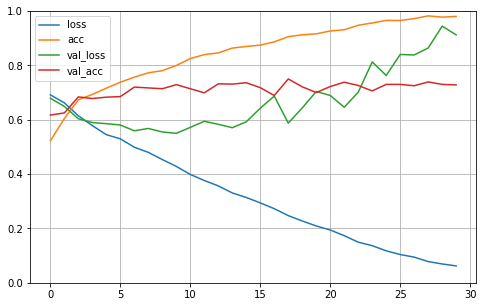

In [14]:
# pd.DataFrame(history.history).plot(figsize=(8,5))

pd.read_csv('history.csv',index_col=0).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)




Increasing gap between accuracy and validation accuracy shows overfitting